# **This file is to run code to produce comparison graphs for the Summer 2025 SULI appointment**
#### *Coded by Brandon Swanson<br>Mentored by Bhupendra Raut*

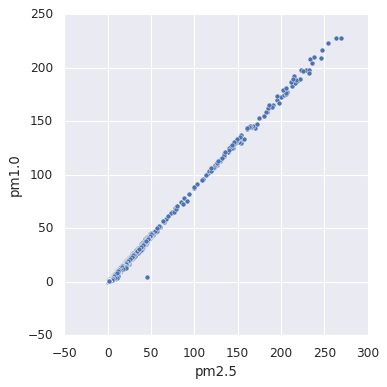

In [30]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_a1_merged_30min.nc', engine='netcdf4')
df = ds.to_pandas

pm2_5 = df()
# pm1 = df['pm1.0']

sns.relplot(data=pm2_5, x='pm2.5', y='pm1.0')
plt.show()

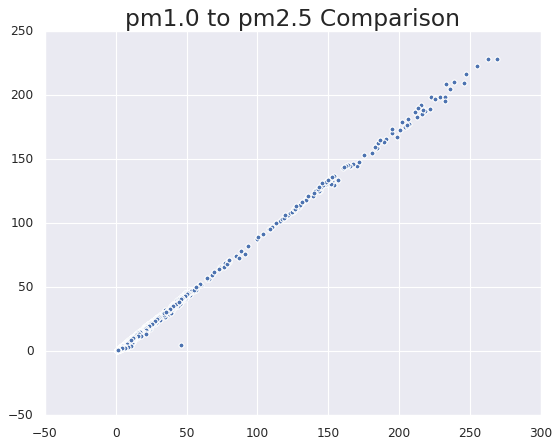

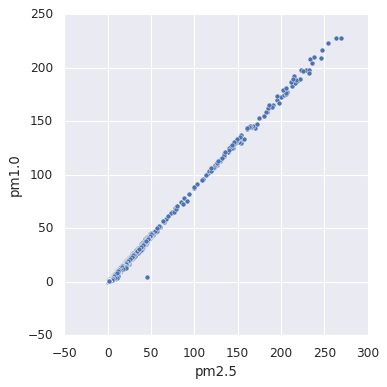

MGC test statistic:  1.0
P-value:  0.0


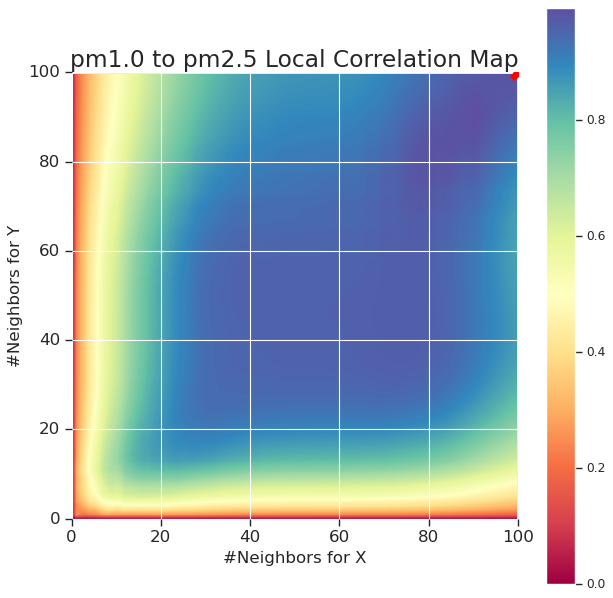

In [49]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_a1_merged_30min.nc', engine='netcdf4')
        df = ds.to_pandas

        pm2_5 = df()

        x = ds['pm2.5']
        y = ds['pm1.0']
        
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        
        sns.relplot(data=pm2_5, x='pm2.5', y='pm1.0')
        ax.scatter(x,y)
        plt.show()
    if not only_viz:
        # local correlation map
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']

        # draw heatmap
        ax.set_title(name + "Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')

        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        ax.invert_yaxis()
        
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
            
        # optimal scale
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1],
                   marker='X', s=200, color='red')
        
        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        plt.show()

def main():
    mgc_plot(x, y, "pm1.0 to pm2.5", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "pm1.0 to pm2.5 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

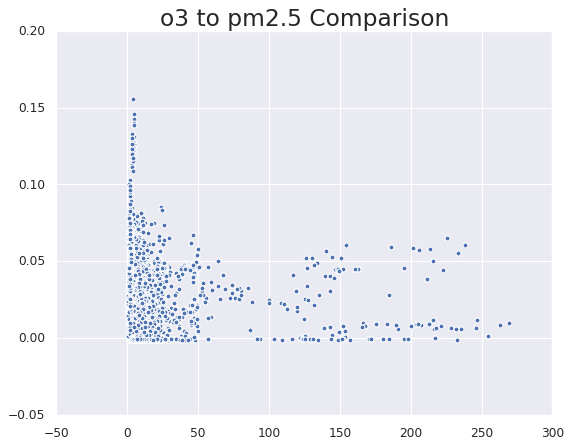

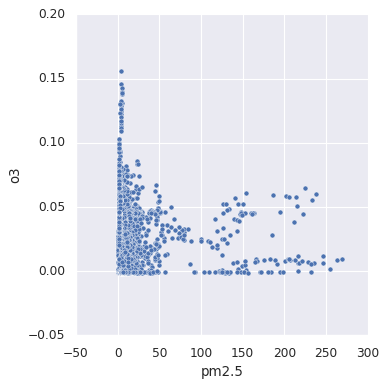


KeyboardInterrupt



In [16]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_a1_merged_30min.nc', engine='netcdf4')
        df = ds.to_pandas

        pm2_5 = df()

        x = ds['pm2.5']
        y = ds['o3']
        
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        
        sns.relplot(data=pm2_5, x='pm2.5', y='o3')
        ax.scatter(x,y)
        plt.show()
    if not only_viz:
        ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_a1_merged_30min.nc', engine='netcdf4')
        df = ds.to_pandas

        pm2_5 = df()

        x = ds['pm2.5']
        y = ds['o3']
        # local correlation map
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']

        # draw heatmap
        ax.set_title(name + "Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')

        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        ax.invert_yaxis()
        
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
            
        # optimal scale
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1],
                   marker='X', s=200, color='red')
        
        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        plt.show()

def main():
    ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_a1_merged_30min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['pm2.5'].values
    y = ds['o3'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "o3 to pm2.5", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "o3 to pm2.5 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

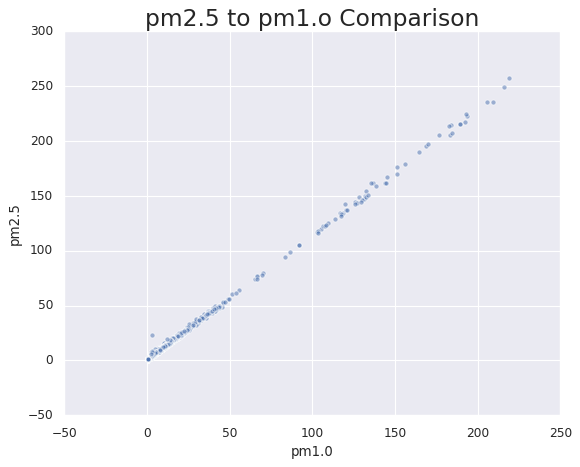

MGC test statistic:  1.0
P-value:  0.0


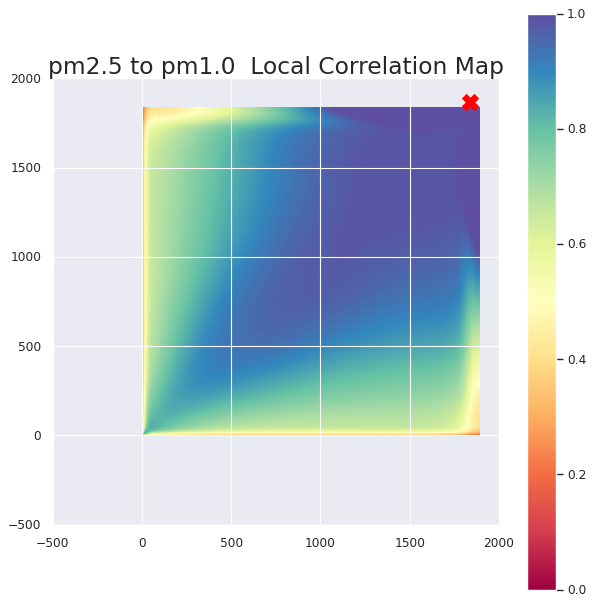

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        ax.scatter(x, y, alpha=0.5)
        plt.xlabel("pm1.0")
        plt.ylabel("pm2.5")
        plt.show()
    if not only_viz and mgc_dict is not None:
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']
        ax.set_title(name + " Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')
        cbar = ax.figure.colorbar(im, ax=ax)
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
        ax.invert_yaxis()
        plt.show()

def main():
    ds = xr.open_dataset('/home/bswanson/Desktop/Data/crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['pm1.0'].values
    y = ds['pm2.5'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    mgc_plot(x, y, "pm2.5 to pm1.o", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "pm2.5 to pm1.0 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

### Work from home code

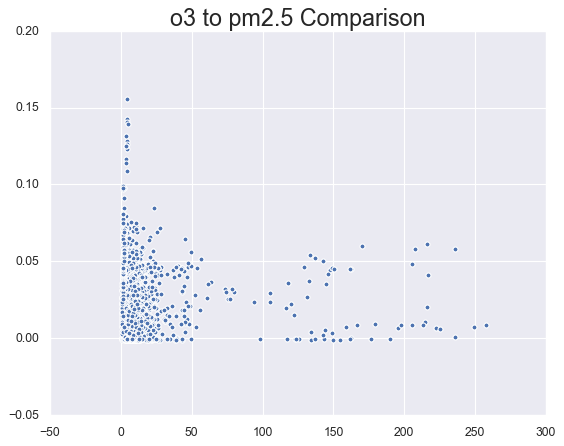

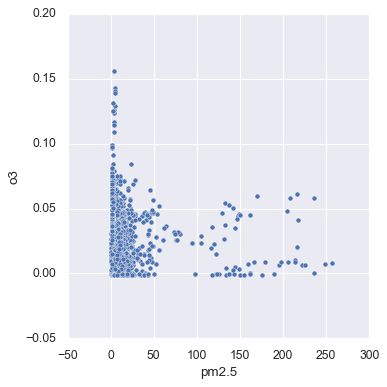

KeyboardInterrupt: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
        df = ds.to_pandas

        pm2_5 = df()

        x = ds['pm2.5']
        y = ds['o3']
        
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        
        sns.relplot(data=pm2_5, x='pm2.5', y='o3')
        ax.scatter(x,y)
        plt.show()
    if not only_viz:
        ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
        df = ds.to_pandas

        pm2_5 = df()

        x = ds['pm2.5']
        y = ds['o3']
        # local correlation map
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']

        # draw heatmap
        ax.set_title(name + "Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')

        # colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("", rotation=-90, va="bottom")
        ax.invert_yaxis()
        
        # Turn spines off and create white grid.
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
            
        # optimal scale
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1],
                   marker='X', s=200, color='red')
        
        # other formatting
        ax.tick_params(bottom="off", left="off")
        ax.set_xlabel('#Neighbors for X', fontsize=15)
        ax.set_ylabel('#Neighbors for Y', fontsize=15)
        ax.tick_params(axis="x", labelsize=15)
        ax.tick_params(axis="y", labelsize=15)
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        plt.show()

def main():
    ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['pm2.5'].values
    y = ds['o3'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "o3 to pm2.5", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "o3 to pm2.5 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

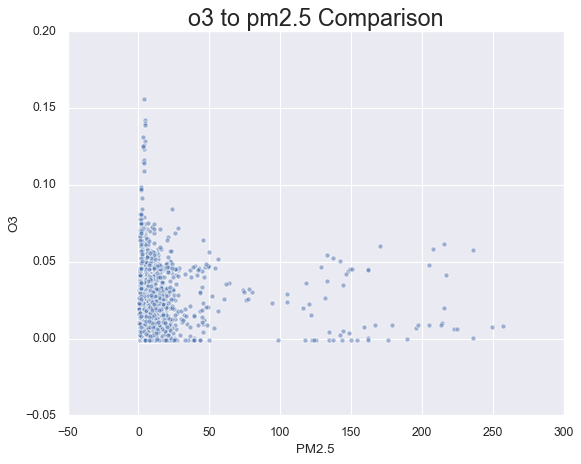

MGC test statistic:  0.0
P-value:  0.1


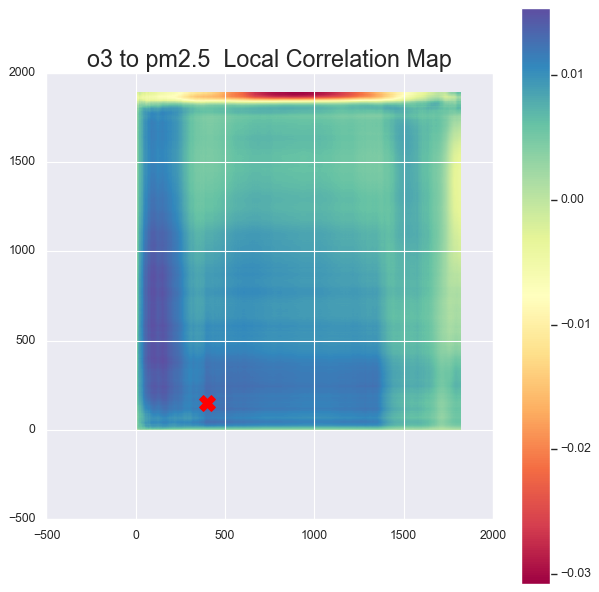

In [10]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        ax.scatter(x, y, alpha=0.5)
        plt.xlabel("PM2.5")
        plt.ylabel("O3")
        plt.show()
    if not only_viz and mgc_dict is not None:
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']
        ax.set_title(name + " Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')
        cbar = ax.figure.colorbar(im, ax=ax)
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
        ax.invert_yaxis()
        plt.show()

def main():
    ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['pm2.5'].values
    y = ds['o3'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "o3 to pm2.5", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "o3 to pm2.5 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

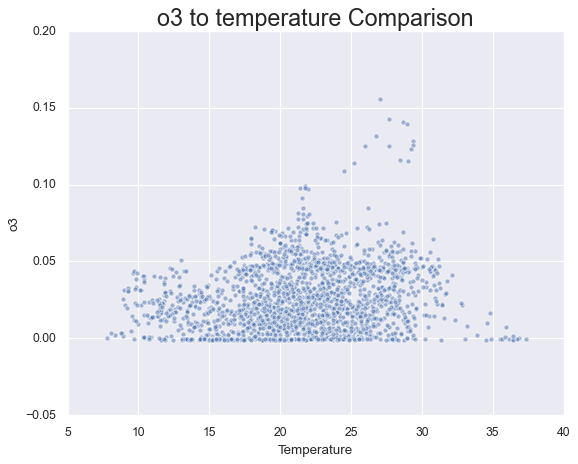

MGC test statistic:  0.1
P-value:  0.0


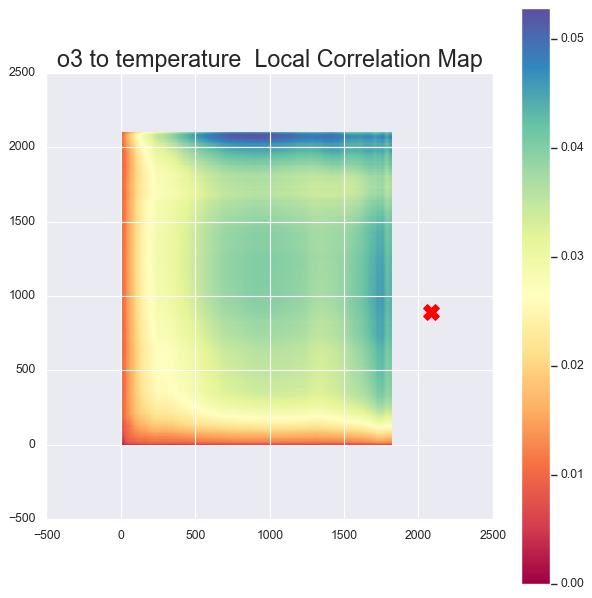

In [13]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        ax.scatter(x, y, alpha=0.5)
        plt.xlabel("Temperature")
        plt.ylabel("o3")
        plt.show()
    if not only_viz and mgc_dict is not None:
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']
        ax.set_title(name + " Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')
        cbar = ax.figure.colorbar(im, ax=ax)
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
        ax.invert_yaxis()
        plt.show()

def main():
    ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['temperature'].values
    y = ds['o3'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "o3 to temperature", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "o3 to temperature ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

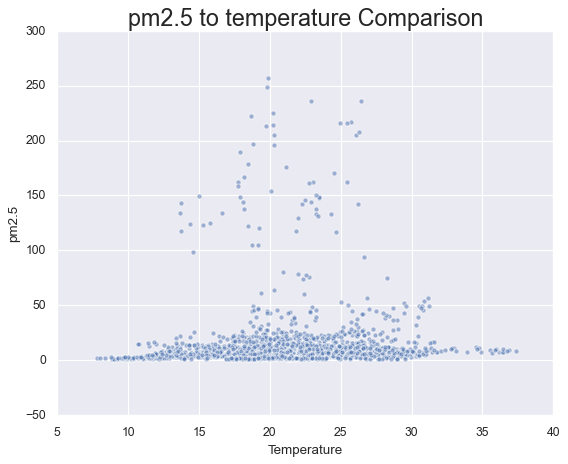

MGC test statistic:  0.0
P-value:  0.0


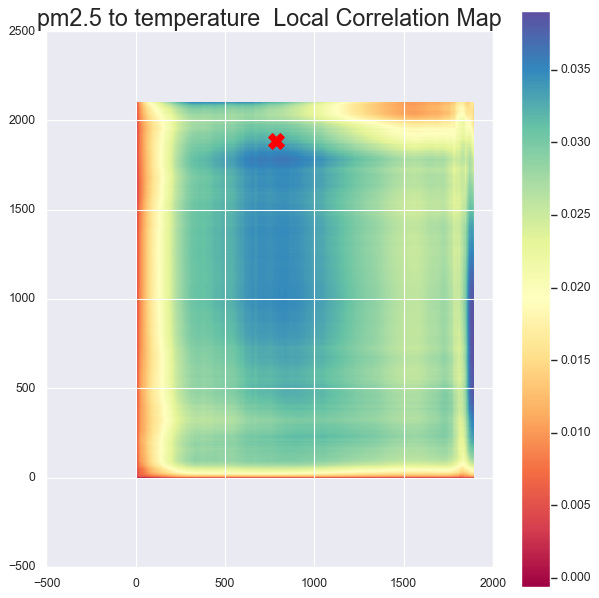

In [14]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        ax.scatter(x, y, alpha=0.5)
        plt.xlabel("Temperature")
        plt.ylabel("pm2.5")
        plt.show()
    if not only_viz and mgc_dict is not None:
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']
        ax.set_title(name + " Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')
        cbar = ax.figure.colorbar(im, ax=ax)
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
        ax.invert_yaxis()
        plt.show()

def main():
    ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['temperature'].values
    y = ds['pm2.5'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "pm2.5 to temperature", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "pm2.5 to temperature ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()

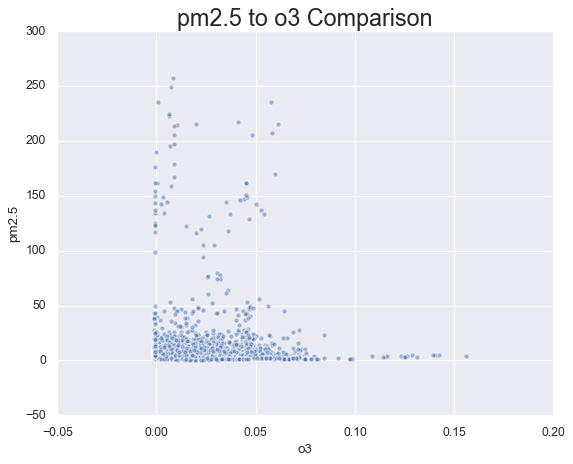

MGC test statistic:  0.0
P-value:  0.1


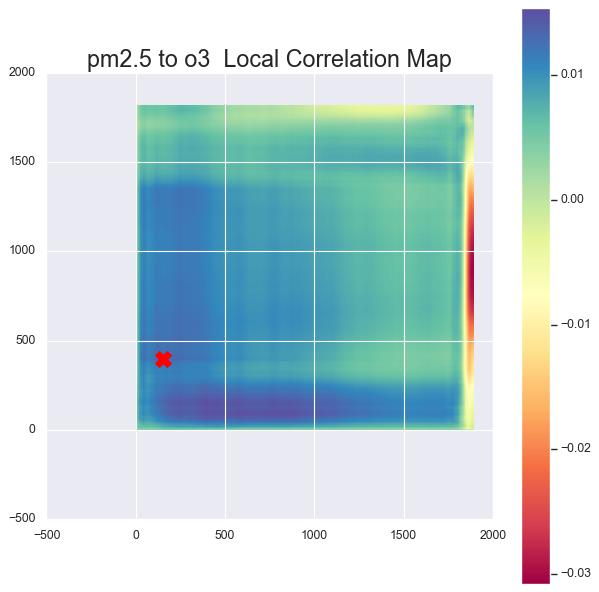

In [15]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
from scipy.stats import multiscale_graphcorr
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set_theme(style="darkgrid")

def mgc_plot(x, y, name, mgc_dict=None, only_viz=False, only_mgc=False):
    if not only_mgc:
        ax = plt.gca()
        ax.set_title(name + ' Comparison', fontsize=21)
        ax.scatter(x, y, alpha=0.5)
        plt.xlabel("o3")
        plt.ylabel("pm2.5")
        plt.show()
    if not only_viz and mgc_dict is not None:
        plt.figure(figsize=(9,9))
        ax = plt.gca()
        mgc_map = mgc_dict['mgc_map']
        ax.set_title(name + " Local Correlation Map", fontsize=21)
        im = ax.imshow(mgc_map, cmap='Spectral')
        cbar = ax.figure.colorbar(im, ax=ax)
        opt_scale = mgc_dict["opt_scale"]
        ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
        ax.invert_yaxis()
        plt.show()

def main():
    ds = xr.open_dataset('D://Data//crocus_neiu_aqt_a1_60min.nc', engine='netcdf4')
    df = ds.to_pandas

    # Extract data as NumPy arrays
    x = ds['o3'].values
    y = ds['pm2.5'].values
    
    # Remove any NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # pm2_5 = df()
    # xy = ds.as_numpy()
    # x = df[('pm2.5')]
    # y = df[('o3')]
    # x = xy['pm2.5']
    # y = xy['o3']
    
    mgc_plot(x, y, "pm2.5 to o3", only_viz=True)

    stat, pvalue, mgc_dict = multiscale_graphcorr(x, y)
    print("MGC test statistic: ", round(stat, 1))
    print("P-value: ", round(pvalue, 1))
    mgc_plot(x, y, "pm2.5 to o3 ", mgc_dict, only_mgc=True)

if __name__ == "__main__":
    main()